In [1]:
# Importing dependencies
import pandas as pd
from matplotlib import pyplot as plt
from sqlalchemy import create_engine

# Creating connection to SQL files
engine = create_engine('postgresql://localhost:5432/sql-challenge')
connection = engine.connect()

In [2]:
# Querying salaries table
salaries = engine.execute("SELECT * FROM salaries WHERE salary IS NOT NULL")

In [3]:
# Adding salaries table data to list
salary_data = []
for i in salaries:
    salary_data.append(i[1])

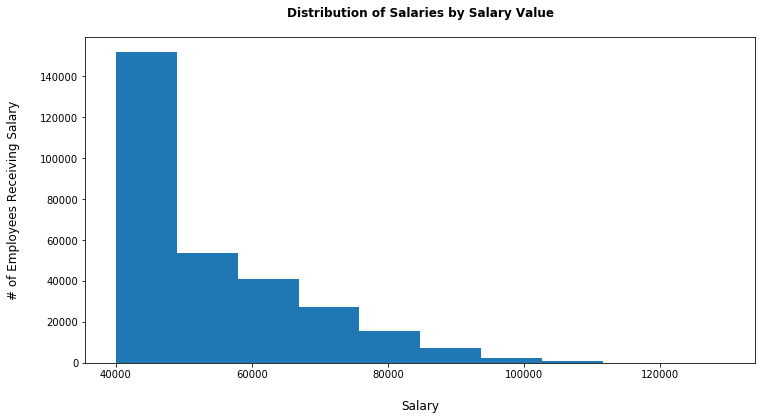

In [23]:
# Generating histogram of salary distribution
plt.figure(figsize=(12, 6))
plt.hist(salary_data)
plt.title('Distribution of Salaries by Salary Value', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Salary', labelpad=20, fontsize='large')
plt.ylabel('# of Employees Receiving Salary', labelpad=20, fontsize='large')
plt.show()

In [5]:
# Querying salaries, employees, and titles tables
titles = engine.execute("""SELECT titles.title, salary FROM salaries 
JOIN employees ON salaries.employee_number = employees.emp_no 
JOIN titles ON employees.emp_title_id = titles.title_id""")

In [6]:
# Extracting queried data to lists
title_data = []
salary_data = []
for i in titles:
    title_data.append(i[0])
    salary_data.append(i[1])

In [7]:
# Building dataframe from lists
title_df = pd.DataFrame()
title_df['title'] = title_data
title_df['salary'] = salary_data

# Creating groupby object to find mean salary data
title_group = title_df.groupby('title')
title_avg = title_group.mean()
title_avg = title_avg.sort_values('salary', ascending=False)

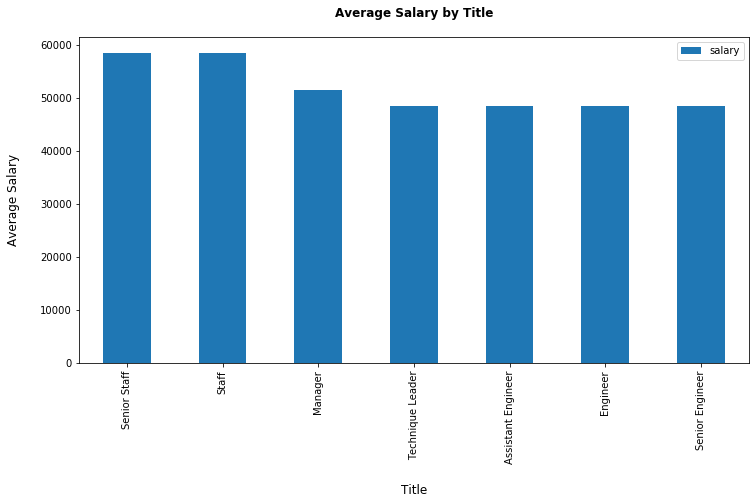

In [13]:
# Plotting bar chart, sorted by average salary descending
avg_plot = title_avg.plot(kind='bar', figsize=(12,6))
plt.title('Average Salary by Title', fontweight='bold', fontsize='large', pad=20)
plt.xlabel('Title', labelpad=20, fontsize='large')
plt.ylabel('Average Salary', labelpad=20, fontsize='large')
plt.show()

In [9]:
# Querying salary data to look at self salary
self = engine.execute("SELECT * FROM salaries WHERE employee_number = 499942")
for i in self:
    print(i)

(499942, 40000)
